In [1]:
import PIL.Image as img
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import os.path
import glob

_FOLDERS_MAP = {
    'left': '/home/jiarui/git/Deeplab_KITTI/visulaization/leftvis',
    'left_est': '/home/jiarui/git/Deeplab_KITTI/reconstruct/reconstruct_left',
    'gt': '/home/jiarui/git/Dataset/KITTI/Segmentation/training/semantic_rgb',
}

_PATTERN_MAP = {
    'left': '_10_prediction.png',
    'left_est': '_10_prediction.png',
    'gt': '_10.png',
}

In [2]:
def _get_files(data):
    pattern = '*%s' % (_PATTERN_MAP[data])
    search_files = os.path.join(_FOLDERS_MAP[data], pattern)
    filenames = glob.glob(search_files)
    return sorted(filenames)

In [3]:
left_est_files = _get_files('left_est')
left_image_files = _get_files('left')
gt_files = _get_files('gt')
left_est = img.open(left_est_files[0])
left_image = img.open(left_image_files[0])
gt_image = img.open(gt_files[0])
#left_est.show()
#left_image.show()
#gt_image.show()

In [5]:
area = (50, 0, 1242, 375)
left_est_crop = left_est.crop(area)
left_image_crop = left_image.crop(area)
gt_crop = gt_image.crop(area)
#left_est_crop.show()
#left_image_crop.show()
#gt_crop.show()

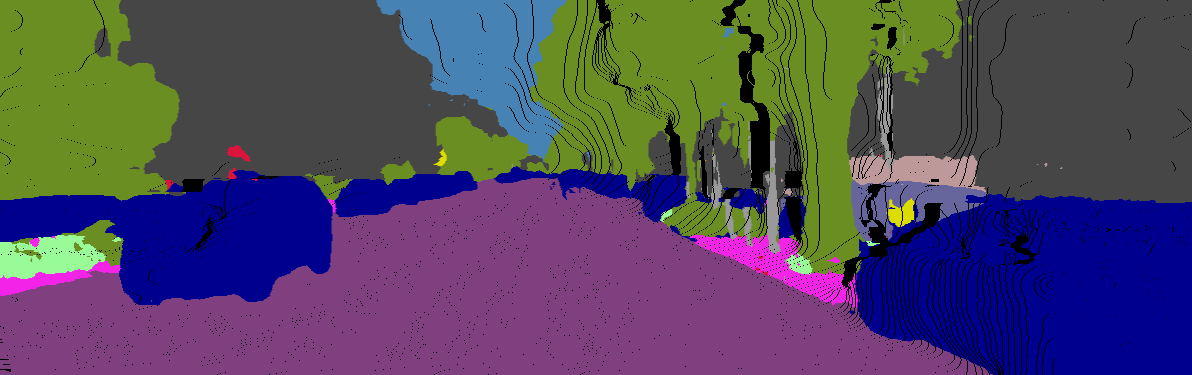

In [6]:
left_est_crop

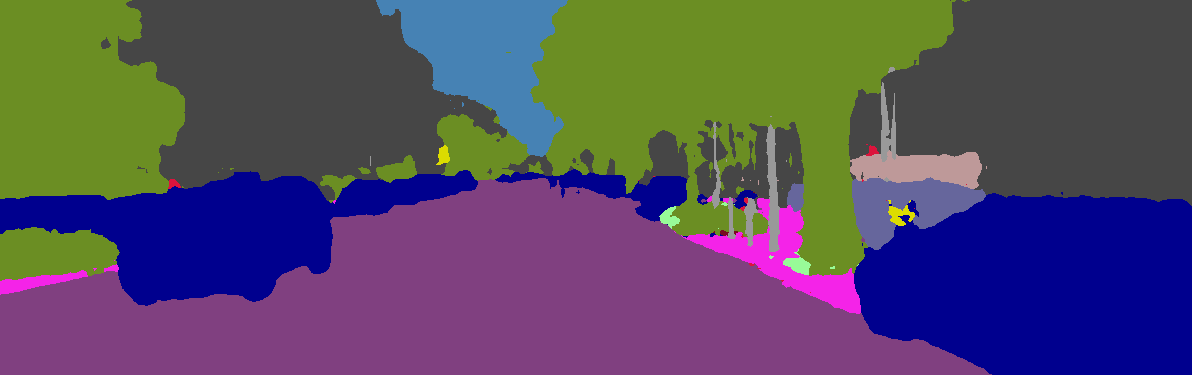

In [7]:
left_image_crop

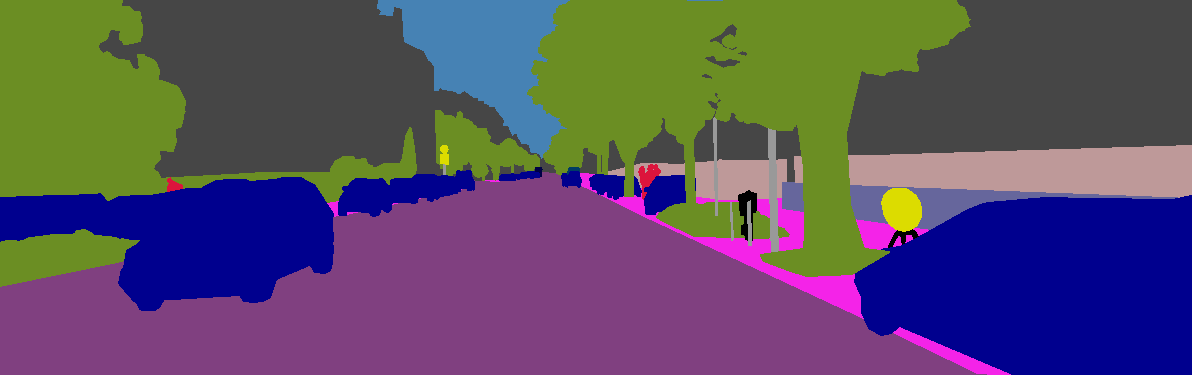

In [8]:
gt_crop

In [9]:
left_est_array = np.asarray(left_est_crop)
left_image_array = np.asarray(left_image_crop)
gt_array = np.asarray(gt_crop)

In [10]:
gt_list = gt_array.reshape([-1, 3]).tolist()
gt_mask_idx = [i for i in range(len(gt_list)) if gt_list[i] == [0, 0, 0]]
left_est_list = left_est_array.reshape([-1, 3]).tolist()
left_est_mask_idx = [i for i in range(len(left_est_list)) if left_est_list[i] == [0, 0, 0]]


In [11]:
# inconsistency between reconstructed left image based on mccnn disparity and left prediction image
est_pre_dif = np.abs(left_est_array - left_image_array)
[h, w, ch] = np.shape(est_pre_dif)
est_pre_list = est_pre_dif.reshape([-1, 3]).tolist()
for i in range(len(est_pre_list)):
    if est_pre_list[i] != [0, 0, 0]:
        est_pre_list[i] = [255, 255, 255]

for i in gt_mask_idx:
    est_pre_list[i] = [0, 0, 0]
    
for i in left_est_mask_idx:
    est_pre_list[i] = [0, 0, 0]

correct = est_pre_list.count([0, 0, 0]) 
est_pre_acc = correct / (h*w*2 - correct)
print(est_pre_acc)

est_pre_dif = np.asarray(est_pre_list, dtype = np.uint8).reshape([h, w, ch])

est_pre_show = img.fromarray(est_pre_dif)
#est_pre_show.show()

0.9112773917691074


In [12]:
# inconsistency between ground truth and left prediction image
pre_gt_dif = np.abs(left_image_array - gt_array)

[h, w, ch] = np.shape(pre_gt_dif)
pre_gt_list = pre_gt_dif.reshape([-1, 3]).tolist()
for i in range(len(pre_gt_list)):
    if pre_gt_list[i] != [0, 0, 0]:
        pre_gt_list[i] = [255, 255, 255]
        
for i in gt_mask_idx:
    pre_gt_list[i] = [0, 0, 0]

correct = pre_gt_list.count([0, 0, 0])
pre_gt_acc = correct / (h*w*2 - correct)
print(pre_gt_acc)

pre_gt_dif = np.asarray(pre_gt_list, dtype = np.uint8).reshape([h, w, ch])

pre_gt_show = img.fromarray(pre_gt_dif)
#pre_gt_show.show()

0.8443561464096946


In [13]:
# inconsistency between reconstructed left image based on mccnn disparity and ground truth
est_gt_dif = left_est_array - gt_array

[h, w, ch] = np.shape(est_gt_dif)
est_gt_list = est_gt_dif.reshape([-1, 3]).tolist()
for i in range(len(est_gt_list)):
    if est_gt_list[i] != [0, 0, 0]:
        est_gt_list[i] = [255, 255, 255]

for i in gt_mask_idx:
    est_gt_list[i] = [0, 0, 0]

for i in left_est_mask_idx:
    est_gt_list[i] = [0, 0, 0]

correct = est_gt_list.count([0, 0, 0])
est_gt_acc = correct / (h*w*2 - correct)
print('left image based on mccnn disparity and ground truth:', est_gt_acc)

est_gt_dif = np.asarray(est_gt_list, dtype = np.uint8).reshape([h, w, ch])


est_gt_show = img.fromarray(est_gt_dif)
#est_gt_show.show()

left image based on mccnn disparity and ground truth: 0.8276041826377603


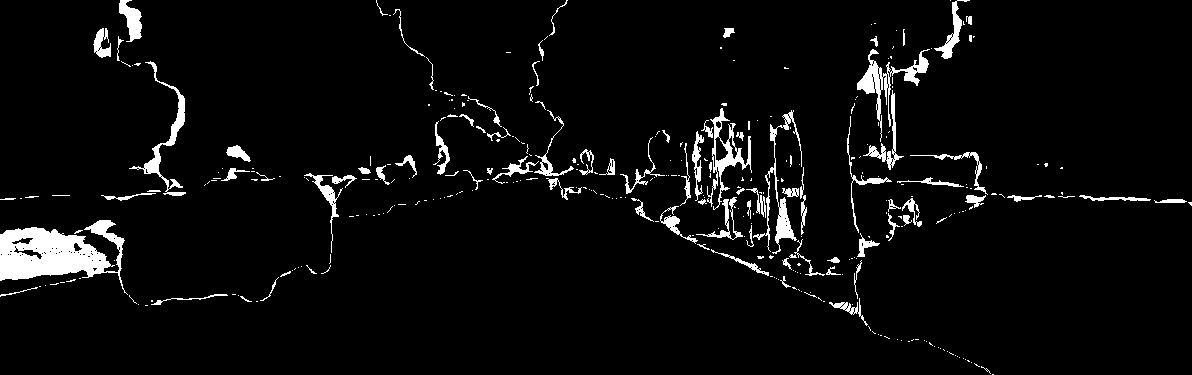

In [14]:
# inconsistency between reconstructed left image and left prediction image
est_pre_show

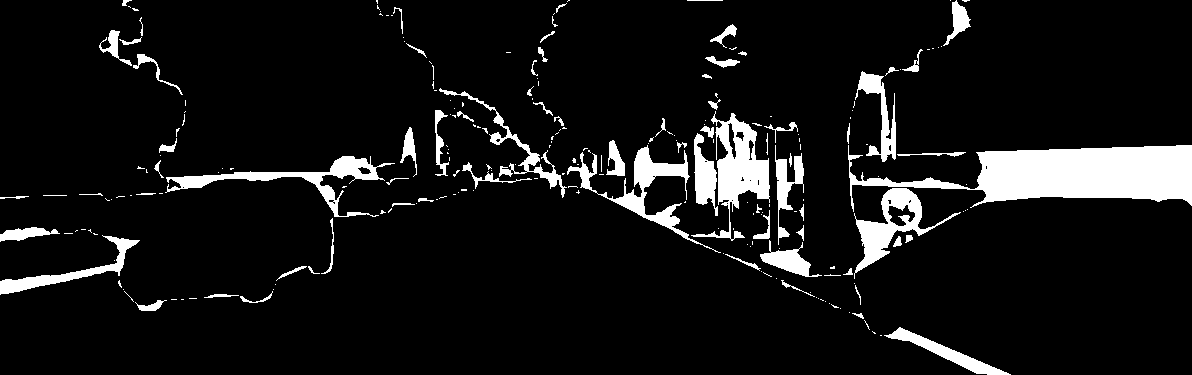

In [15]:
# inconsistency between ground truth and left prediction image
pre_gt_show

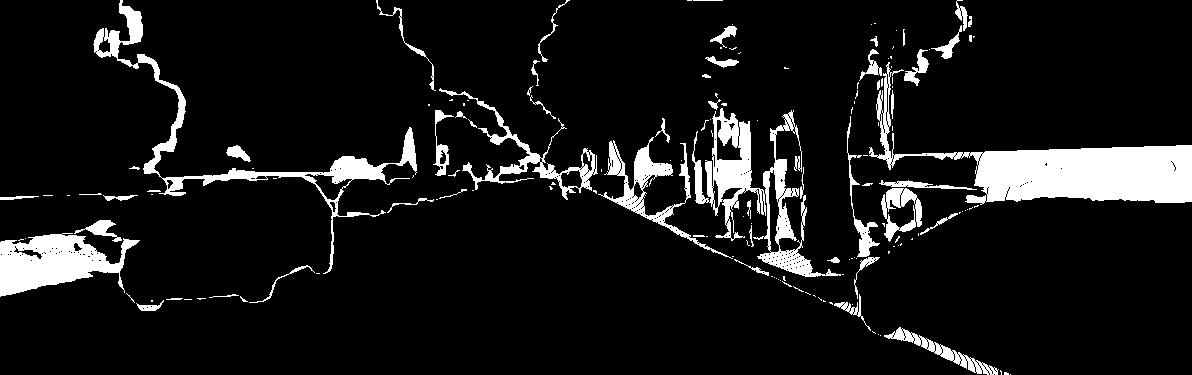

In [16]:
# inconsistency between reconstructed left image and ground truth
est_gt_show

In [17]:
(image_name,_) = os.path.splitext(os.path.basename(left_image_files[0]))
save_dir = '/home/jiarui/git/Deeplab_KITTI/inconsistency/inconsistency_images'
filename = '%s/%s_%s' % (save_dir, image_name, 'est_pre_show.png')
est_pre_show.save(filename)

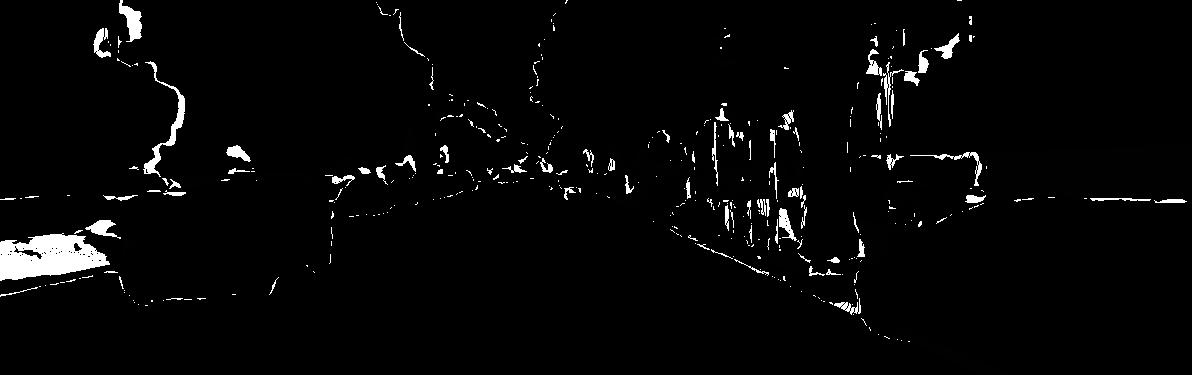

In [18]:
dif = est_pre_dif - pre_gt_dif
dif_show = img.fromarray(dif)
dif_show

In [19]:
[h, w, ch] = np.shape(est_pre_dif)
est_pre_list = est_pre_dif.reshape([-1, 3]).tolist()
pre_gt_list = pre_gt_dif.reshape([-1, 3]).tolist()
dif_list = list(est_pre_list)
tn = 0
fp = 0
fn = 0
tp = 0
for i in range(len(est_pre_list)):
    if est_pre_list[i] == [0, 0, 0] and pre_gt_list[i] == [0, 0, 0]:
        dif_list[i] = [0, 0, 0] # true negative
        tn = tn + 1
    elif est_pre_list[i] == [255, 255, 255] and pre_gt_list[i] == [0, 0, 0]:
        dif_list[i] = [255, 0, 0] # false positive, red
        fp = fp + 1
    elif est_pre_list[i] == [0, 0, 0] and pre_gt_list[i] == [255, 255, 255]:
        dif_list[i] = [0, 0, 255] # false negative, blue
        fn = fn + 1
    elif est_pre_list[i] == [255, 255, 255] and pre_gt_list[i] == [255, 255, 255]:
        dif_list[i] = [255, 255, 255] # true positive
        tp = tp + 1

tn_per = tn/(tn + fp + fn + tp)
fp_per = fp/(tn + fp + fn + tp)
fn_per = fn/(tn + fp + fn + tp)
tp_per = tp/(tn + fp + fn + tp)
print(tn_per)
print(fp_per)
print(fn_per)
print(tp_per )

dif = np.asarray(dif_list, dtype = np.uint8).reshape([h, w, ch])


dif_show = img.fromarray(dif)
#dif_show.show()

0.8877114093959732
0.027899328859060404
0.06586800894854586
0.01852125279642058


In [21]:
from xlwt import *
file = Workbook(encoding='utf-8')
table = file.add_sheet('data')
data = {
    "Name":["True Negative", "False Positive", "False Negative", "True Positive"],
    "1":[tn, fp, fn, tp]
}

In [22]:
num = [a for a in data]

In [24]:
num[0]

'Name'

In [30]:
t = [num[0]]
for i in data[num[0]]:
    t.append(i)
t

['Name', 'True Negative', 'False Positive', 'False Negative', 'True Positive']

In [46]:
tn

396807

In [47]:
fp

12471

In [48]:
fn

29443

In [49]:
tp

8279

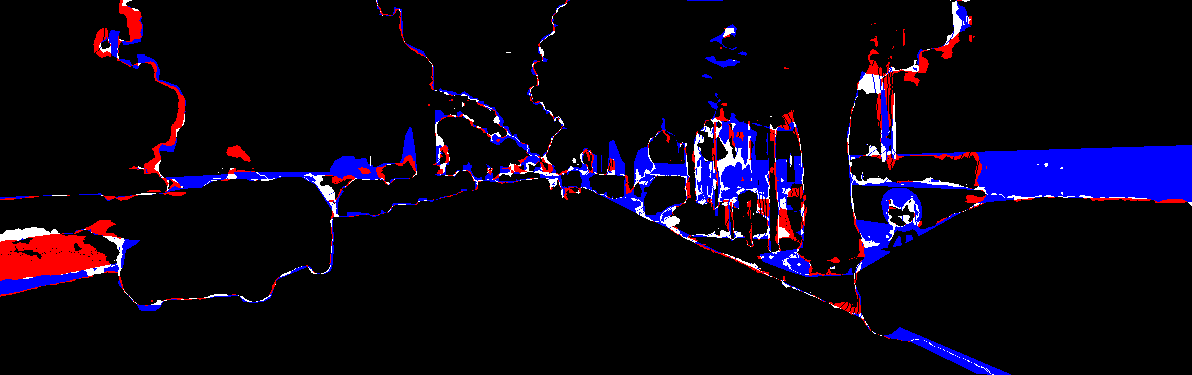

In [50]:
dif_show

In [31]:
[h, w, ch] = np.shape(est_pre_dif)
est_gt_list = est_gt_dif.reshape([-1, 3]).tolist()
pre_gt_list = pre_gt_dif.reshape([-1, 3]).tolist()
dif_list2 = list(est_pre_list)
tn = 0
fp = 0
fn = 0
tp = 0
for i in range(len(est_gt_list)):
    if est_gt_list[i] == [0, 0, 0] and pre_gt_list[i] == [0, 0, 0]:
        dif_list2[i] = [0, 0, 0] # true negative
        tn = tn + 1
    elif est_gt_list[i] == [255, 255, 255] and pre_gt_list[i] == [0, 0, 0]:
        dif_list2[i] = [255, 0, 0] # false positive, red
        fp = fp + 1
    elif est_gt_list[i] == [0, 0, 0] and pre_gt_list[i] == [255, 255, 255]:
        dif_list2[i] = [0, 0, 255] # false negative, blue
        fn = fn + 1
    elif est_gt_list[i] == [255, 255, 255] and pre_gt_list[i] == [255, 255, 255]:
        dif_list2[i] = [255, 255, 255] # true positive
        tp = tp + 1

tn_per = tn/(tn + fp + fn + tp)
fp_per = fp/(tn + fp + fn + tp)
fn_per = fn/(tn + fp + fn + tp)
tp_per = tp/(tn + fp + fn + tp)
print(tn_per)
print(fp_per)
print(fn_per)
print(tp_per )

dif2 = np.asarray(dif_list2, dtype = np.uint8).reshape([h, w, ch])


dif_show2 = img.fromarray(dif2)

0.8877114093959732
0.027899328859060404
0.017959731543624163
0.06642953020134228


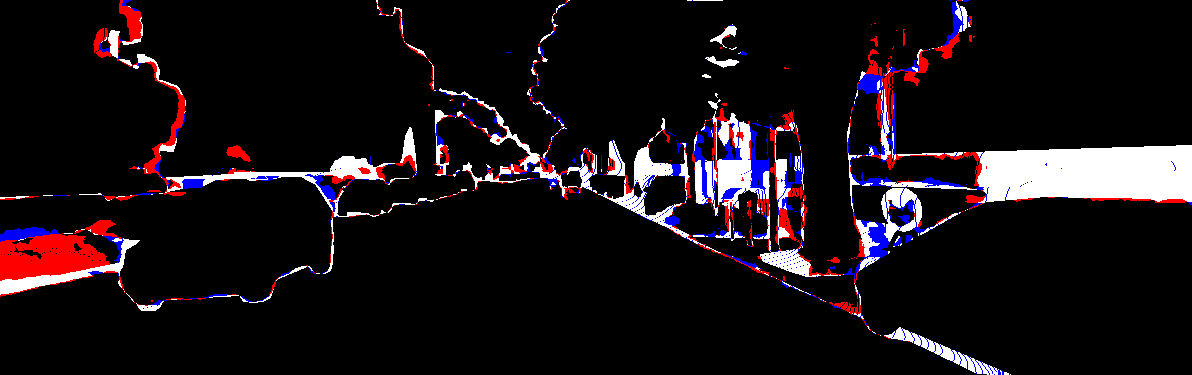

In [32]:
dif_show2

In [34]:
A = [1, 2, 3]
B = [4, 5]
A.append(B)

In [35]:
A

[1, 2, 3, [4, 5]]

In [36]:
5/6

0.8333333333333334

In [37]:
float(5)

5.0

In [39]:
print(">>processing image ", image_name)

>>processing image  000000_10_prediction
